# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd  
import numpy as np  
%matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import seaborn as sns

# For stats functions
from scipy import stats

# Libraries for data preparation and model building
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
#More libraries to be added aas we go along


# ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
#Load the data that accompanies this Predict, save it in two dataframes - one the train data and one test 
df_train = pd.read_csv('./df_train.csv', parse_dates=['time'],infer_datetime_format=True)
df_test = pd.read_csv('./df_test.csv', parse_dates=['time'],infer_datetime_format=True)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


#### 3.1  Look at the features of the data

3.1.1 - Data's head (i.e first five columns)

In [3]:
# Display the first 5 columns of the training data to get a feel for what we're working with 
pd.set_option('display.max_columns', None)
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


#### Observations:

- The data has 49 columns.
- Of the 49 columns, 2 (Valencia_wind_deg and Seville_pressure) are categorical while the remaining 47 columns are numeric. The date column of this data is continuous and as such, it is treated as a numeric column.
- Only 5 regions are represented in the data. They are; Madrid,Valencia, bibao, Barcelona and Seville.
- The first column of the data contains the data's index. We may want to drop it since index naturally appear in dataframes.

3.1.2 - Shape of data

In [4]:
# Let us have a look at the shape of the training data
df_train.shape

(8763, 49)

#### Observations:

- The data has 49 columns.
- The data has 8763 rows. That is, each column of the data has 8763 entries including missing values (when present in a column).

3.1.3 - Data info

In [5]:
# Let us also check for information about the columns of the training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
Unnamed: 0              8763 non-null int64
time                    8763 non-null datetime64[ns]
Madrid_wind_speed       8763 non-null float64
Valencia_wind_deg       8763 non-null object
Bilbao_rain_1h          8763 non-null float64
Valencia_wind_speed     8763 non-null float64
Seville_humidity        8763 non-null float64
Madrid_humidity         8763 non-null float64
Bilbao_clouds_all       8763 non-null float64
Bilbao_wind_speed       8763 non-null float64
Seville_clouds_all      8763 non-null float64
Bilbao_wind_deg         8763 non-null float64
Barcelona_wind_speed    8763 non-null float64
Barcelona_wind_deg      8763 non-null float64
Madrid_clouds_all       8763 non-null float64
Seville_wind_speed      8763 non-null float64
Barcelona_rain_1h       8763 non-null float64
Seville_pressure        8763 non-null object
Seville_rain_1h         8763 non-null float64
Bilbao_snow_3h  

#### Observations:

- The data has 49 columns.
- Of the 49 columns present in the data, 45 columns have float data type, 1 column has datetime data type, 1 column is of int data type and 2 columns have string data type.
- The Valencia_pressure column contain missing values. 2068 of the entries in this column are missing values. This is the only column (in the data) that has missing values.
- All the columns of the data have the appropriate data type.

#### 3.2  Look at data statistics


3.2.1 - Summary Statistics

In [6]:
# Let us have a look at the summary statistics of the training data
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1018.000000,304.150000,1022.00

#### Observations:
There are many observations here. Below are few of them;

- The mean of all wind_speed columns fall between 1.85 and 2.7.
- Data about the humidity in Bilbao and Barcelona are absent. We only have that of Seville, Madrid and Valencia. Across these 3 regions, the minimum humidity is 6.33 while the maximum is 100.00.
- The Barcelona_pressure column has entries that are way higher than that of the other (i.e Bilbao, Valencia and Madrid) pressure columns. The Seville_pressure column is not numeric, so we cannot compare it with that of other regions yet.

3.2.2 - Skewness

In [7]:
skewness = df_train.skew().reset_index()
skewness.columns = ['column', 'skew']

# Columns of this data that are fairly symmetrical
fairly_sym_col = []
for i in range(len(skewness)):
    if skewness['skew'][i] > -0.5 and skewness['skew'][i] < 0.5:
        fairly_sym_col.append(skewness['column'][i])

# Columns of this data that are Moderately Negatively Skewed
mod_neg = []
for i in range(len(skewness)):
    if skewness['skew'][i] > -1 and skewness['skew'][i] < -0.5:
        mod_neg.append(skewness['column'][i])
        
# Columns of this data that are Moderately Positively Skewed
mod_pos = []
for i in range(len(skewness)):
    if skewness['skew'][i] > 0.5 and skewness['skew'][i] < 1:
        mod_pos.append(skewness['column'][i])
        
# Columns of this data that are Highly Negatively Skewed
high_neg = []
for i in range(len(skewness)):
    if skewness['skew'][i] < -1:
        high_neg.append(skewness['column'][i])
        
# Columns of this data that are Highly Positively Skewed
high_pos = []
for i in range(len(skewness)):
    if skewness['skew'][i] > 1:
        high_pos.append(skewness['column'][i])

#### Observations:

In [8]:
print('There are ' + str(len(fairly_sym_col)) + ' fairly symmetrical columns in this data. They are:')
fairly_sym_col

There are 23 fairly symmetrical columns in this data. They are:


['Unnamed: 0',
 'Seville_humidity',
 'Madrid_humidity',
 'Bilbao_clouds_all',
 'Bilbao_wind_deg',
 'Barcelona_wind_deg',
 'Seville_temp_max',
 'Valencia_temp_max',
 'Valencia_temp',
 'Seville_temp',
 'Valencia_humidity',
 'Valencia_temp_min',
 'Barcelona_temp_max',
 'Madrid_temp_max',
 'Barcelona_temp',
 'Bilbao_temp_min',
 'Bilbao_temp',
 'Barcelona_temp_min',
 'Bilbao_temp_max',
 'Seville_temp_min',
 'Madrid_temp',
 'Madrid_temp_min',
 'load_shortfall_3h']

In [9]:
print('There is just ' + str(len(mod_neg)) + ' moderately negatively skewed column in this data. It is the ' + mod_neg[0] + ' column')

There is just 1 moderately negatively skewed column in this data. It is the Bilbao_pressure column


In [10]:
print('There is no (i.e ' + str(len(mod_pos)) + ') moderately positively skewed columns in this data.')

There is no (i.e 0) moderately positively skewed columns in this data.


In [11]:
print('There are ' + str(len(high_neg)) + ' highly negatively skewed columns in this data. They are:')
high_neg

There are 6 highly negatively skewed columns in this data. They are:


['Madrid_weather_id',
 'Barcelona_weather_id',
 'Seville_weather_id',
 'Valencia_pressure',
 'Madrid_pressure',
 'Bilbao_weather_id']

In [12]:
print('The highly positively skewed columns of this data are: ')
print('There are ' + str(len(high_pos)) + ' highly positively skewed columns in this data. They are:')
high_pos

The highly positively skewed columns of this data are: 
There are 16 highly positively skewed columns in this data. They are:


['Madrid_wind_speed',
 'Bilbao_rain_1h',
 'Valencia_wind_speed',
 'Bilbao_wind_speed',
 'Seville_clouds_all',
 'Barcelona_wind_speed',
 'Madrid_clouds_all',
 'Seville_wind_speed',
 'Barcelona_rain_1h',
 'Seville_rain_1h',
 'Bilbao_snow_3h',
 'Barcelona_pressure',
 'Seville_rain_3h',
 'Madrid_rain_1h',
 'Barcelona_rain_3h',
 'Valencia_snow_3h']

3.2.3 - Kurtosis

In [13]:
kurtosis = df_train.kurtosis().reset_index()
kurtosis.columns = ['column', 'kurtosis']

# Columns of this data that have large number of outliers
large = []
for i in range(len(kurtosis)):
    if kurtosis['kurtosis'][i] > 3:
        large.append(kurtosis['column'][i])

# Columns of this data that lack outliers
lack = []
for i in range(len(kurtosis)):
    if kurtosis['kurtosis'][i] < 3:
        lack.append(kurtosis['column'][i])

#### Observations:

In [14]:
print(str(len(large)) + ' columns of this data have large number of outliers. They are:')
large

14 columns of this data have large number of outliers. They are:


['Bilbao_rain_1h',
 'Valencia_wind_speed',
 'Bilbao_wind_speed',
 'Barcelona_rain_1h',
 'Seville_rain_1h',
 'Bilbao_snow_3h',
 'Barcelona_pressure',
 'Seville_rain_3h',
 'Madrid_rain_1h',
 'Barcelona_rain_3h',
 'Valencia_snow_3h',
 'Madrid_weather_id',
 'Barcelona_weather_id',
 'Seville_weather_id']

In [15]:
print(str(len(lack)) + ' columns of this data do not have outliers (or do not have large number of outliers). They are:')
lack

32 columns of this data do not have outliers (or do not have large number of outliers). They are:


['Unnamed: 0',
 'Madrid_wind_speed',
 'Seville_humidity',
 'Madrid_humidity',
 'Bilbao_clouds_all',
 'Seville_clouds_all',
 'Bilbao_wind_deg',
 'Barcelona_wind_speed',
 'Barcelona_wind_deg',
 'Madrid_clouds_all',
 'Seville_wind_speed',
 'Bilbao_pressure',
 'Valencia_pressure',
 'Seville_temp_max',
 'Madrid_pressure',
 'Valencia_temp_max',
 'Valencia_temp',
 'Bilbao_weather_id',
 'Seville_temp',
 'Valencia_humidity',
 'Valencia_temp_min',
 'Barcelona_temp_max',
 'Madrid_temp_max',
 'Barcelona_temp',
 'Bilbao_temp_min',
 'Bilbao_temp',
 'Barcelona_temp_min',
 'Bilbao_temp_max',
 'Seville_temp_min',
 'Madrid_temp',
 'Madrid_temp_min',
 'load_shortfall_3h']

#### A look at the distribution of the predicted variable 

The variable to be predicted is the **load_shortfall_3h**. Let us plot a histogram and a boxplot for this variable.

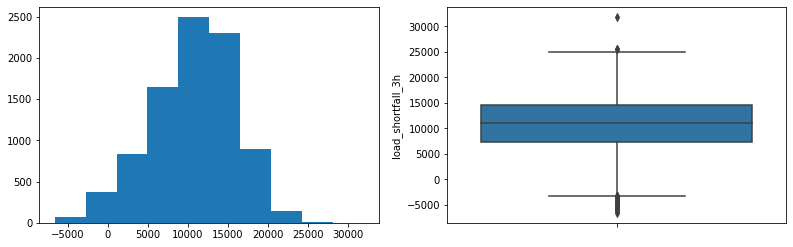

In [16]:
# Let us have a look at the distribution of the variable to be predicted
plt.figure(figsize=(5,3))
plt.subplot(1,2,1)
plt.hist(x='load_shortfall_3h', data=df_train)
plt.subplot(1,2,2)
sns.boxplot(y='load_shortfall_3h', data=df_train, color = sns.color_palette()[0])
plt.subplots_adjust(left=None, right=2.2, top=3.0, bottom=2.0);

#### Observations:

- The histogram shows the distribution of the variable is fairly symmetrical.
- The boxplot shows the variable has outliers but the number of outliers is not large.

#### 3.2 plot relevant feature interactions


3.2.1 - Univariate plots

- We will be creating univariate plots for some selected variables of this dataset.

**Windspeed**

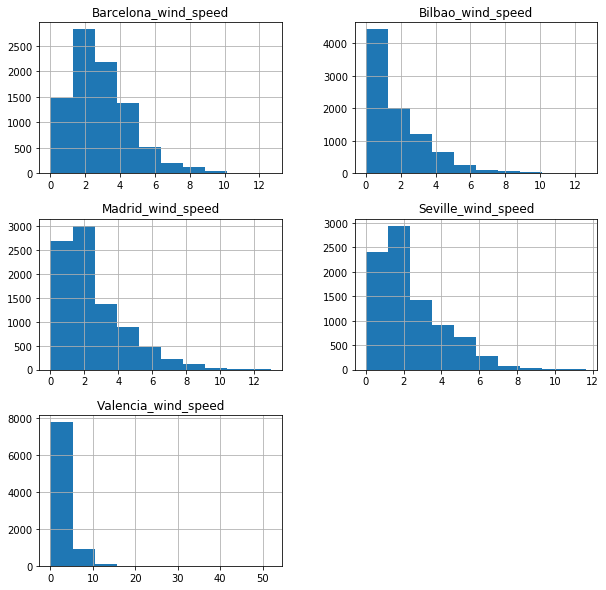

In [17]:
# Let us plot a histogram for the distribution of wind speed in each region
features = ['Madrid_wind_speed', 'Seville_wind_speed', 'Valencia_wind_speed', 'Barcelona_wind_speed', 'Bilbao_wind_speed']
df_train[features].hist(figsize=(10,10));

#### Observations:
- The distribution of wind speed in all 5 regions are rightly skewed  and are somewhat identical when looked at.

**Pressure**

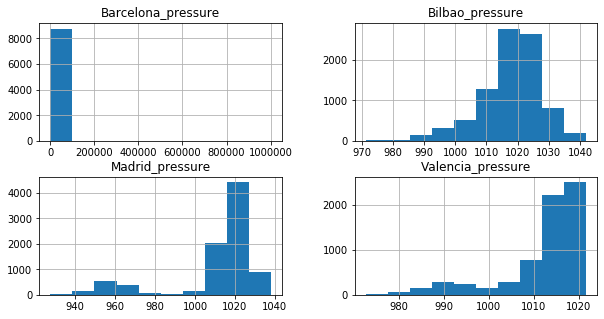

In [18]:
# Let us plot a histogram for the distribution of pressure in each region
features_2 = ['Madrid_pressure', 'Valencia_pressure', 'Barcelona_pressure', 'Bilbao_pressure']
df_train[features_2].hist(figsize=(10,5));

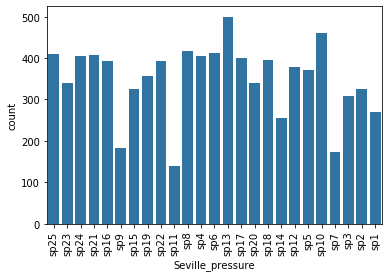

<Figure size 288x144 with 0 Axes>

In [19]:
# for the pressure in Seville, we will be using a countplot since the variable is categorical
sns.countplot(x='Seville_pressure',data=df_train,color = sns.color_palette()[0])
plt.xticks(rotation=90)
plt.figure(figsize=(4,2));

#### Observations:
- The distribution of pressure in Madrid, Valencia and Bilbao are skewed to the left and they all have similar ranges of values.
- The range of pressure values in Barcelona is way bigger than that of the other regions. 8745 of the 8763 Barcelona pressure entries are between the range of 670 - 1039 while 18 entries ranges from 33954 to 1001411. This shows there are outliers present in the column.
- The pressure entries in Seville are categorical. sp13 has the highest number of entries while sp11 has the lowest.

In [20]:
# Number of barcelona pressure values below 1040
len(df_train[df_train['Barcelona_pressure']<1040])

8745

In [21]:
# Number of barcelona pressure values above 1040. As a matter of fact, the lowest of them is above 30000
len(df_train[df_train['Barcelona_pressure']>1040])

18

**Temperature**

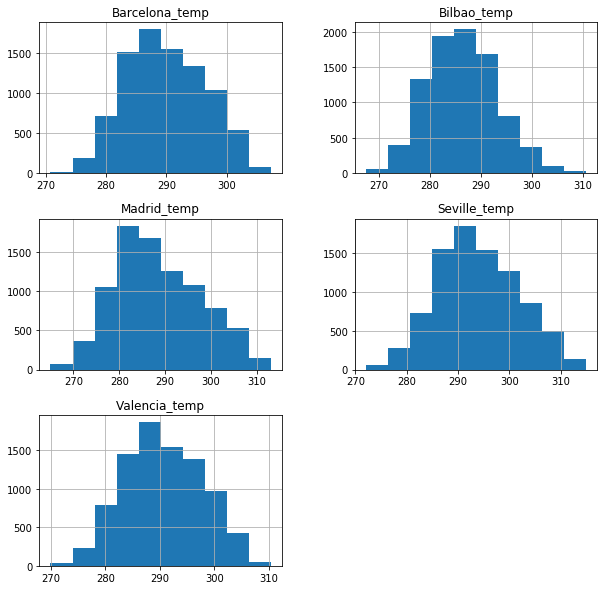

In [22]:
# Let us plot a histogram for the distribution of temperature in each region
features = ['Madrid_temp', 'Seville_temp', 'Valencia_temp', 'Barcelona_temp', 'Bilbao_temp']
df_train[features].hist(figsize=(10,10));

#### Observations:
- The distribution of temperature in all 5 regions are rightly skewed and they all have similar ranges of values.

3.2.2 - Bivariate plots
- We will be creating bivariate plots for the following:
1) Wind Speed vs Temperature 2) Pressure vs Temperature

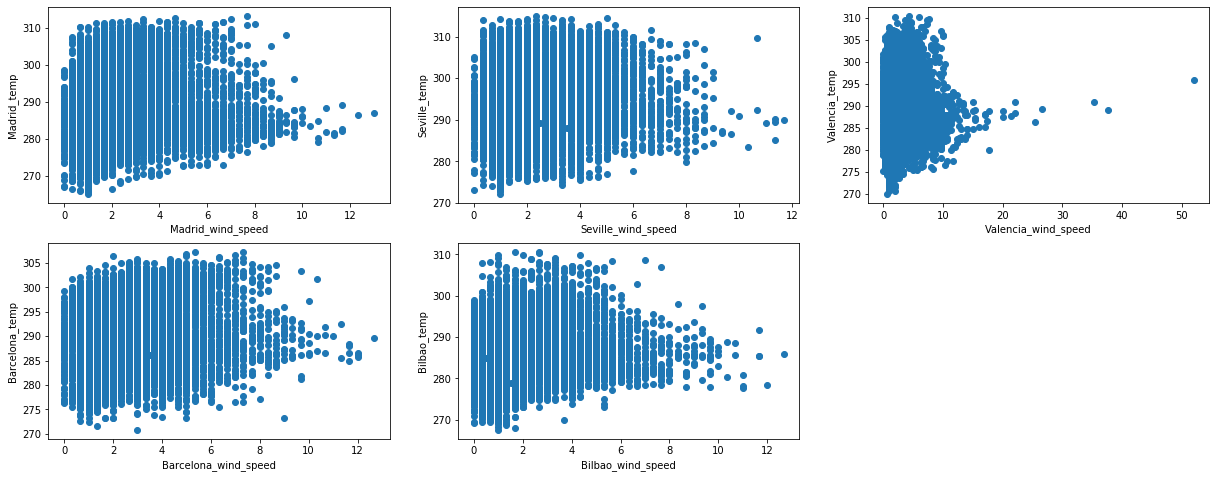

In [23]:
#Let us plot a scatterplot to see the relationship between windspeed and temperature
plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.scatter(x='Madrid_wind_speed',y='Madrid_temp',data=df_train)
plt.xlabel('Madrid_wind_speed'),plt.ylabel('Madrid_temp')
plt.subplot(2,3,2)
plt.scatter(x='Seville_wind_speed',y='Seville_temp',data=df_train)
plt.xlabel('Seville_wind_speed'),plt.ylabel('Seville_temp')
plt.subplot(2,3,3)
plt.scatter(x='Valencia_wind_speed',y='Valencia_temp',data=df_train)
plt.xlabel('Valencia_wind_speed'),plt.ylabel('Valencia_temp')
plt.subplot(2,3,4)
plt.scatter(x='Barcelona_wind_speed',y='Barcelona_temp',data=df_train)
plt.xlabel('Barcelona_wind_speed'),plt.ylabel('Barcelona_temp')
plt.subplot(2,3,5)
plt.scatter(x='Bilbao_wind_speed',y='Bilbao_temp',data=df_train)
plt.xlabel('Bilbao_wind_speed'),plt.ylabel('Bilbao_temp')
plt.subplots_adjust(left=None, right=1.2, top=3.0, bottom=2.0);

#### Observations:
There is no identifiable relationship between wind speed and temperature in each region.

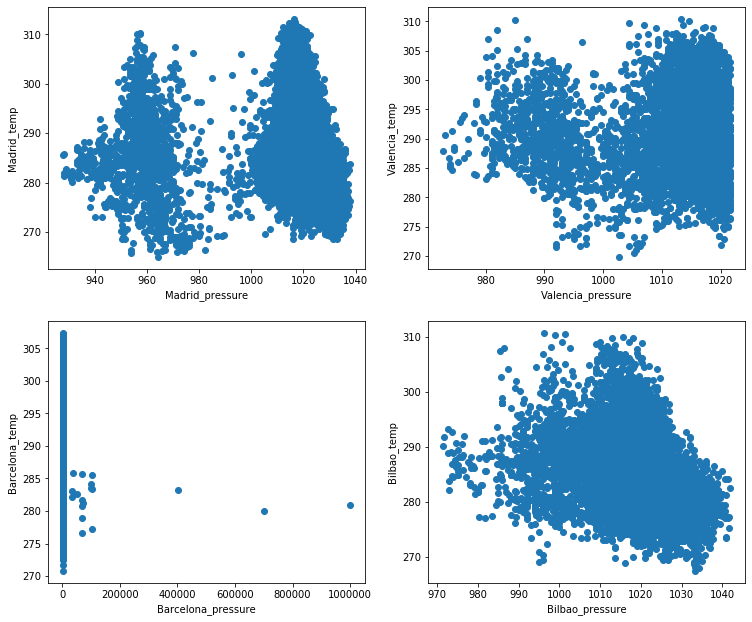

In [24]:
#Let us plot a scatterplot to see the relationship between pressure and temperature
plt.figure(figsize=(9,4))
plt.subplot(2,2,1)
plt.scatter(x='Madrid_pressure',y='Madrid_temp',data=df_train)
plt.xlabel('Madrid_pressure'),plt.ylabel('Madrid_temp')
plt.subplot(2,2,2)
plt.scatter(x='Valencia_pressure',y='Valencia_temp',data=df_train)
plt.xlabel('Valencia_pressure'),plt.ylabel('Valencia_temp')
plt.subplot(2,2,3)
plt.scatter(x='Barcelona_pressure',y='Barcelona_temp',data=df_train)
plt.xlabel('Barcelona_pressure'),plt.ylabel('Barcelona_temp')
plt.subplot(2,2,4)
plt.scatter(x='Bilbao_pressure',y='Bilbao_temp',data=df_train)
plt.xlabel('Bilbao_pressure'),plt.ylabel('Bilbao_temp')
plt.subplots_adjust(left=None, right=1.2, top=4.0, bottom=2.0);

#### Observations:
There is no detected relationship between pressure and temperature in each region.

#### 3.3 evaluate correlation


3.3.1 - Correlation

In [25]:
df_train.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,-0.218781,-0.140449,-0.116928,-0.093926,-0.075692,-0.075340,-0.092377,-0.040157,-0.082525,-0.068980,-0.104326,-0.028130,0.047202,0.034761,-0.022475,0.072472,0.267772,0.039424,0.385578,0.087002,0.135294,0.192485,0.042897,0.023917,0.185468,0.047417,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157088,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.079778,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.37785

3.3.2 - Linearity
- We will be plotting each numeric variable against the response variable to check for linearity.

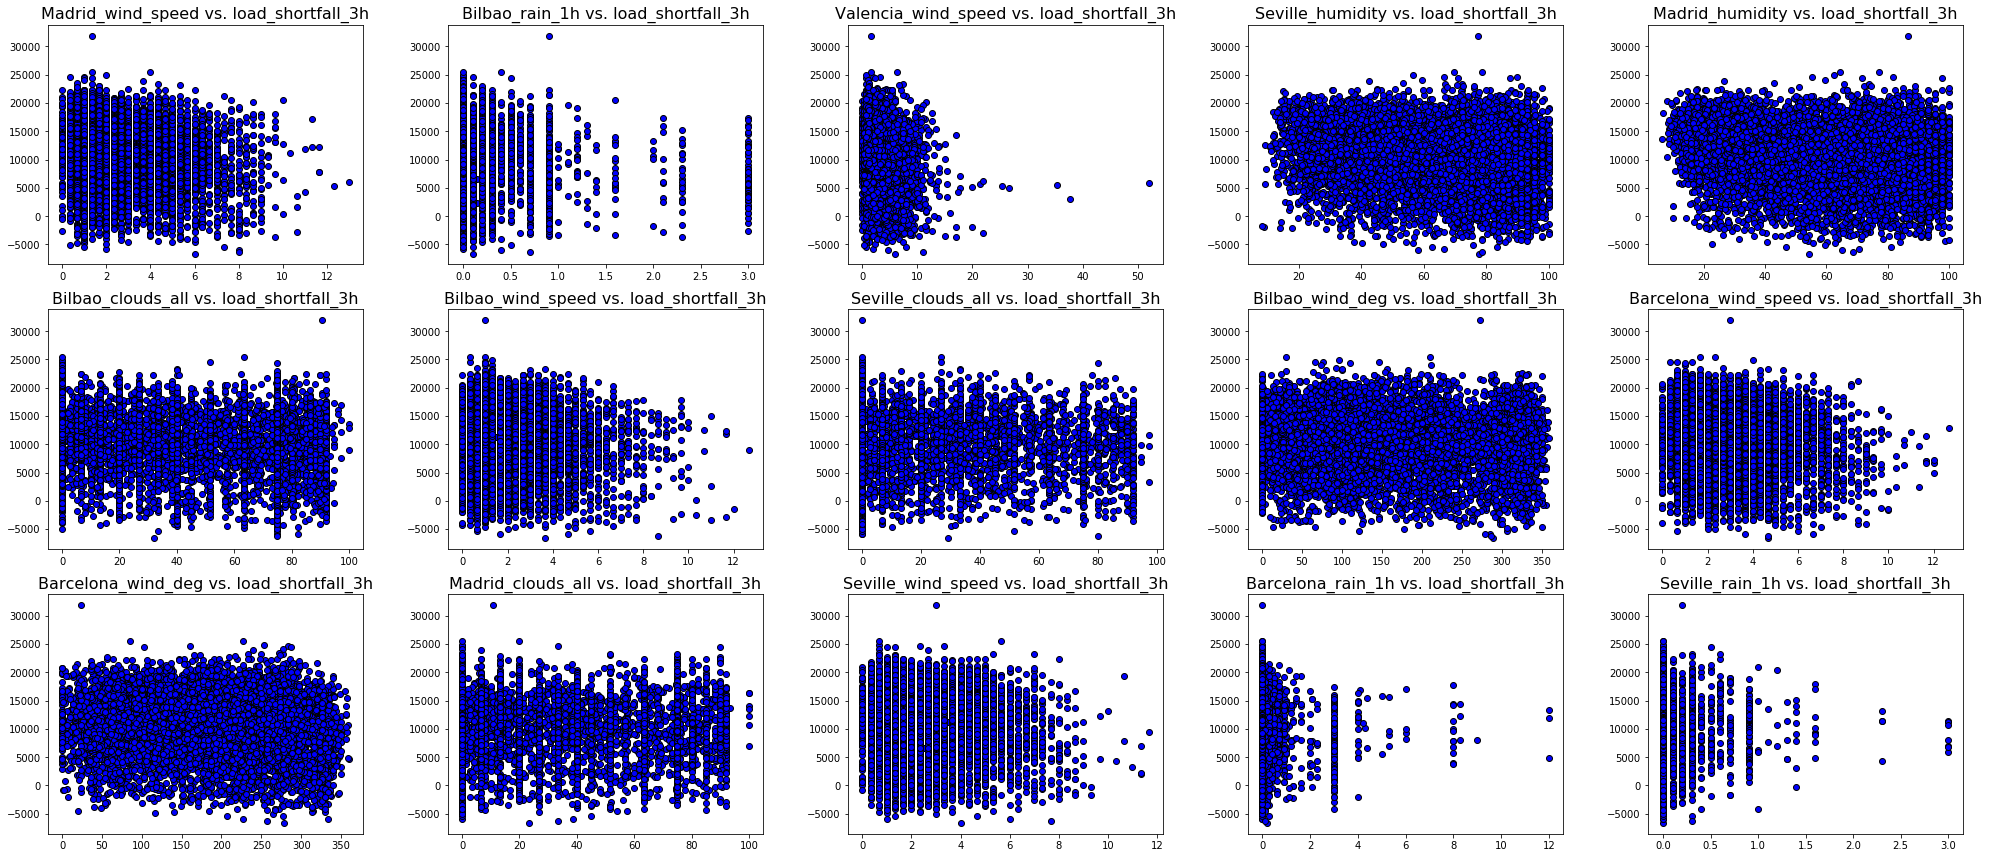

In [26]:
# We will be using scatter plots to check for linearity. As such, let us drop the non-numeric columns.
df_train_numeric = df_train.drop(['Unnamed: 0','time','Valencia_wind_deg','Seville_pressure'], axis=1)

fig, axs = plt.subplots(3,5, figsize=(28,12),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()
# After the dropping, we are left with 45 columns. Let us create the scatter plot for the first 15 columns
for index, column in enumerate(df_train_numeric.columns[:15]):
    axs[index].set_title("{} vs. load_shortfall_3h".format(column),fontsize=16)
    axs[index].scatter(x=df_train_numeric[column],y=df_train_numeric['load_shortfall_3h'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

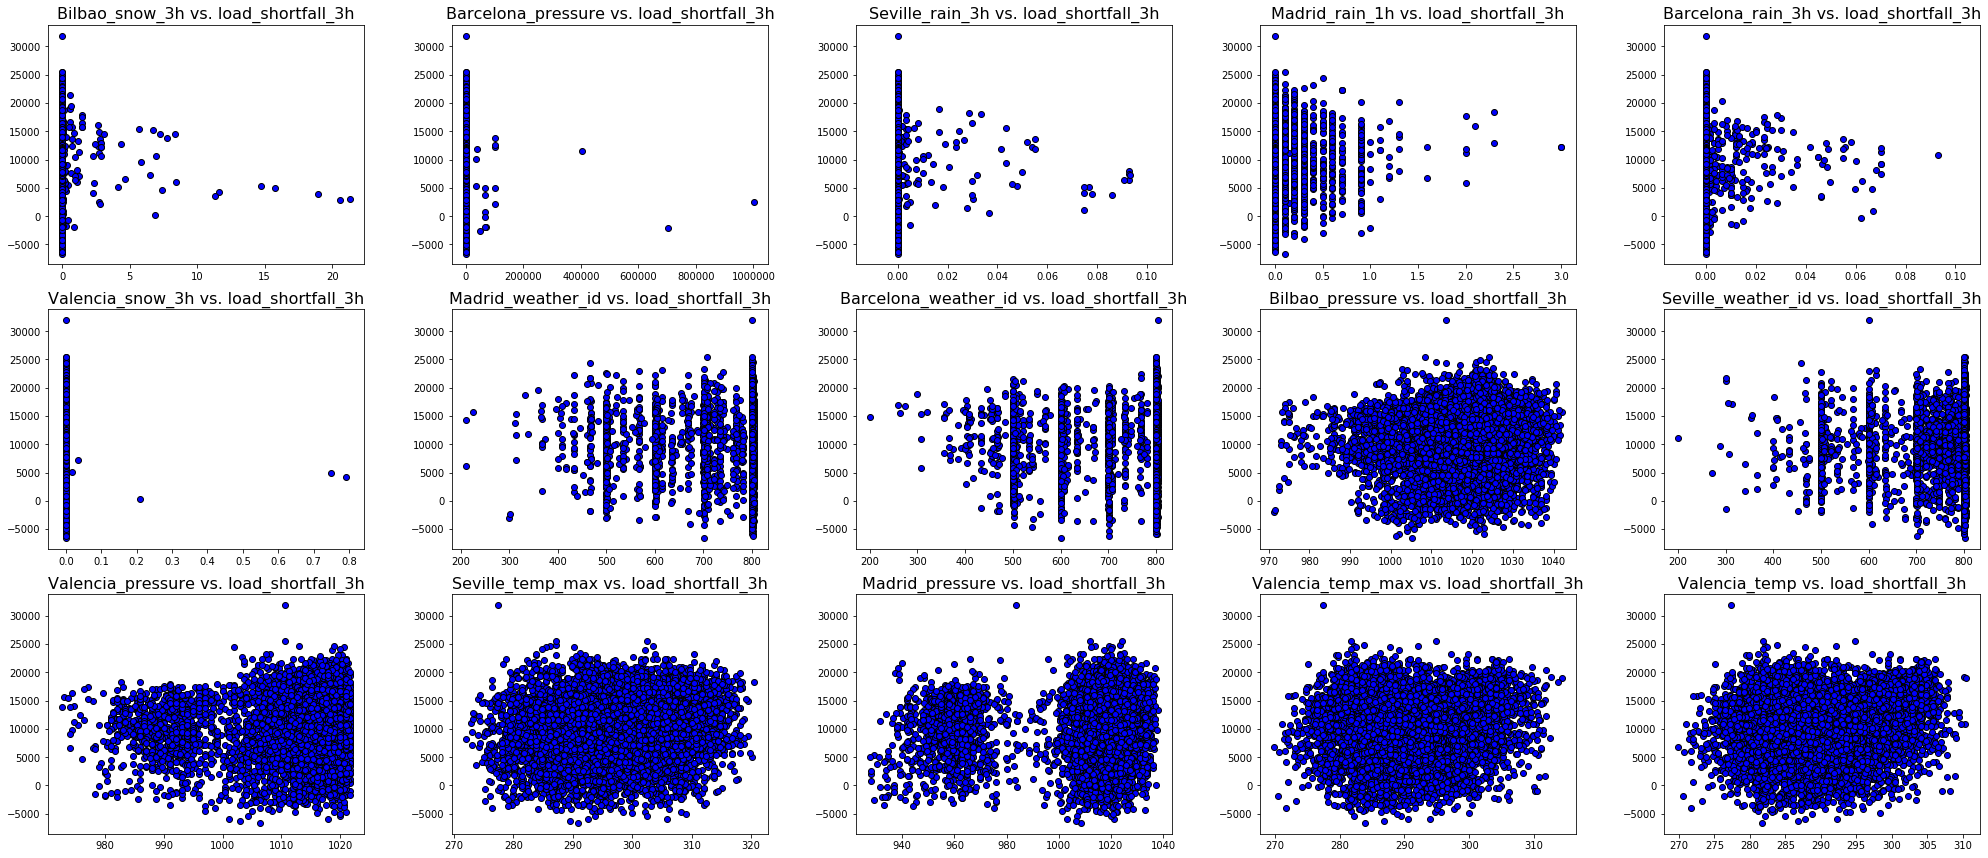

In [27]:
# Let us repeat the steps for the next 15 columns
fig, axs = plt.subplots(3,5, figsize=(28,12),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df_train_numeric.columns[15:30]):
    axs[index].set_title("{} vs. load_shortfall_3h".format(column),fontsize=16)
    axs[index].scatter(x=df_train_numeric[column],y=df_train_numeric['load_shortfall_3h'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

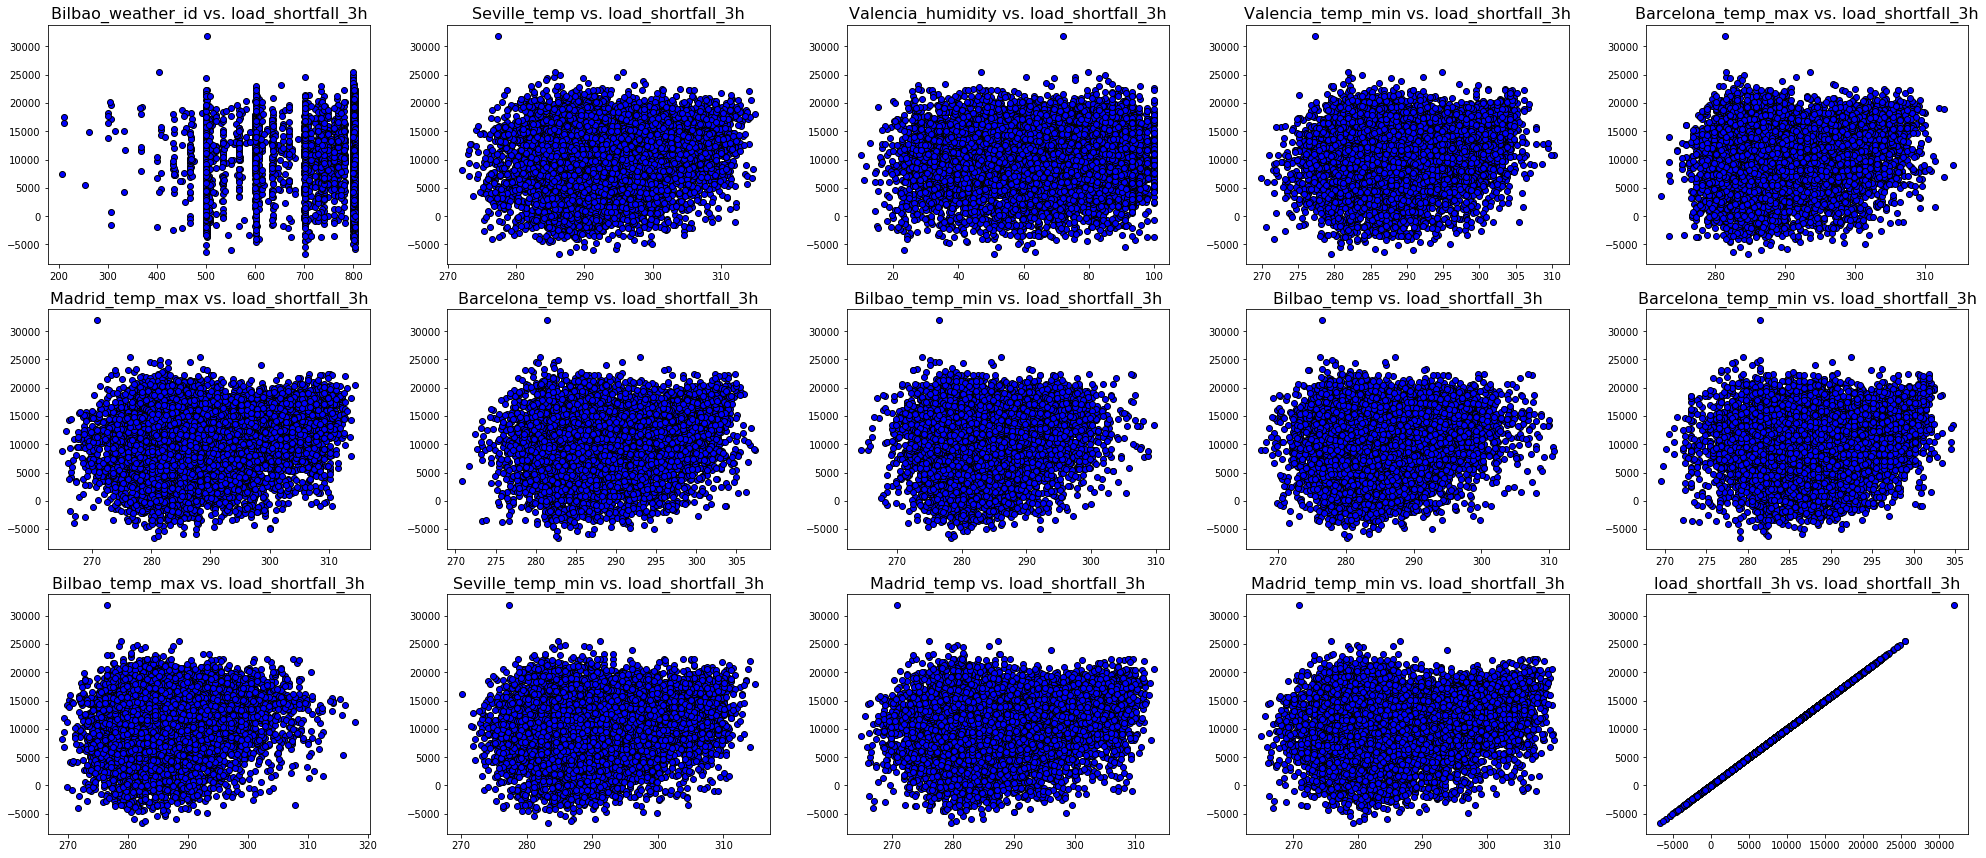

In [28]:
# Let us do the same thing for the last 15 columns
fig, axs = plt.subplots(3,5, figsize=(28,12),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df_train_numeric.columns[30:]):
    axs[index].set_title("{} vs. load_shortfall_3h".format(column),fontsize=16)
    axs[index].scatter(x=df_train_numeric[column],y=df_train_numeric['load_shortfall_3h'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

#### Observations:
Almost all of the variables have non-linear relationships with the response variable.

3.3.3 - Multicollinearity

In [29]:
from statsmodels.graphics.correlation import plot_corr
correlations = df_train_numeric.drop('load_shortfall_3h', axis='columns').corr()

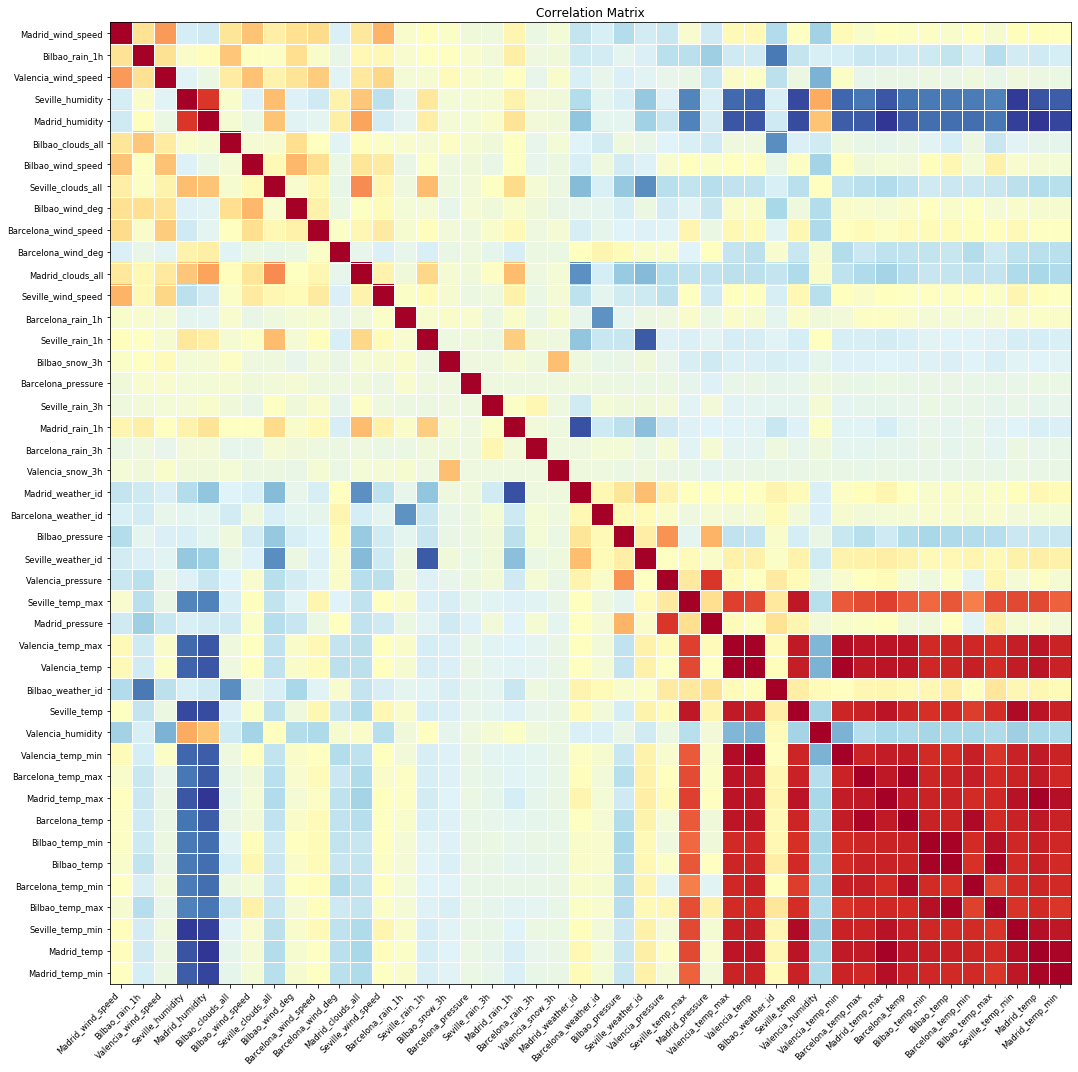

In [30]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_train_numeric.drop('load_shortfall_3h', axis='columns').corr(), xnames = df_train_numeric.drop('load_shortfall_3h', axis='columns').corr().columns, ax = ax);

#### Observations:
Alot of variables in this dataset are collinear.

#### 3.4 have a look at feature distributions

## Preprocessing step 

### Dealing with the Object data types 

Pre-processing step: 

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

#### 4.1 remove missing values/ features

In [ ]:
#remove missing values

#### 4.2 create new features

In [ ]:
#Create new features

#### 4.3  engineer existing features

In [ ]:
# Engineer existing features

In [ ]:
# Find rows and columns where correlation coefficients > 0.9 or <-0.9

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
<a id="five"></a>

    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic